In [1]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [4]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [6]:
google_data.shape

(4951, 6)

In [7]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4.951000e+03
mean,43.420150,43.879723,42.984091,43.440817,43.440817,1.171060e+08
std,40.736900,41.196186,40.331433,40.771152,40.771152,1.503888e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.940372,13.074493,12.814468,12.939250,12.939250,2.790400e+07
50%,26.832500,27.003363,26.605000,26.823357,26.823357,5.838586e+07
75%,59.053249,59.667000,58.539999,59.218000,59.218000,1.451741e+08
max,160.279999,161.699997,158.600006,160.789993,160.789993,1.650833e+09


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4951 entries, 2004-08-19 to 2024-04-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4951 non-null   float64
 1   High       4951 non-null   float64
 2   Low        4951 non-null   float64
 3   Close      4951 non-null   float64
 4   Adj Close  4951 non-null   float64
 5   Volume     4951 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 270.8 KB


In [9]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
%pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Closing price of Google data')

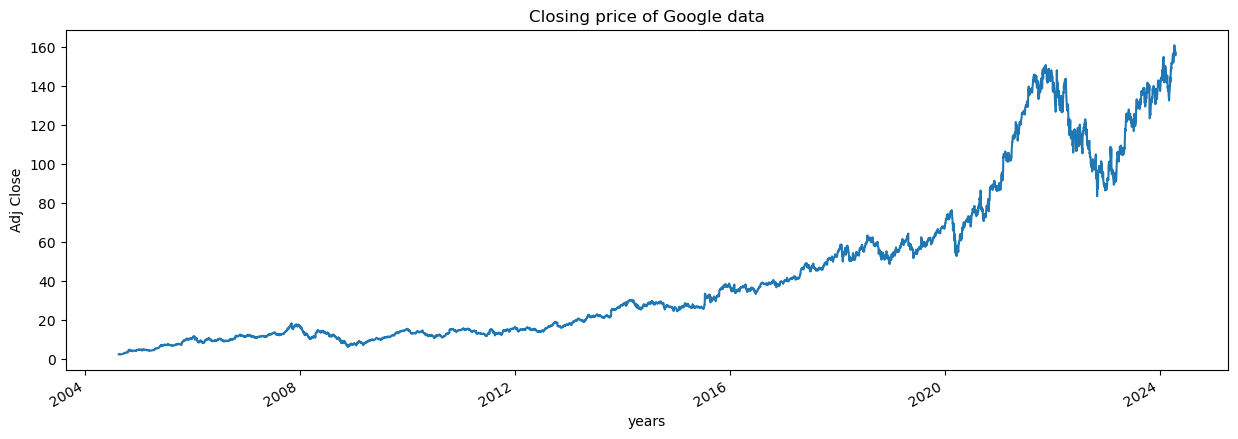

In [11]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [13]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

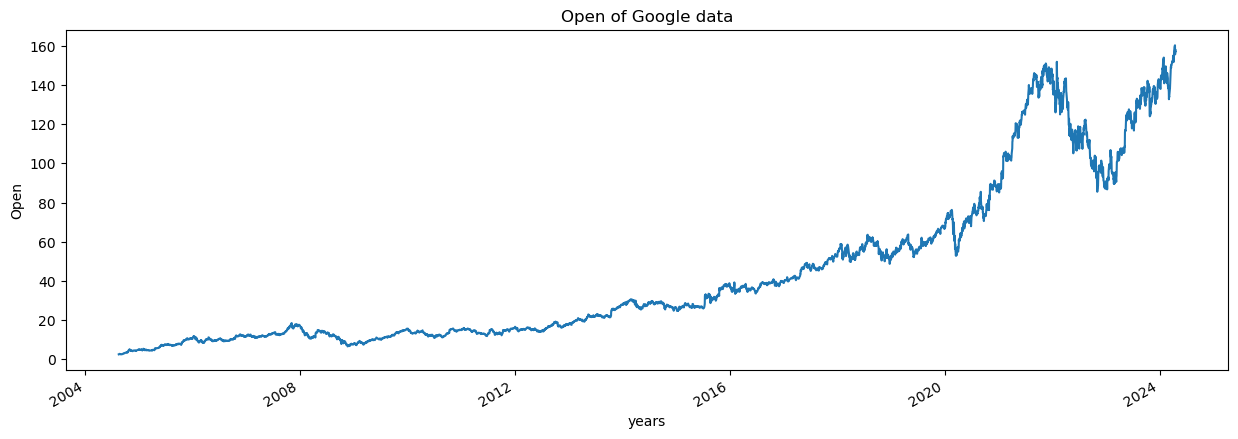

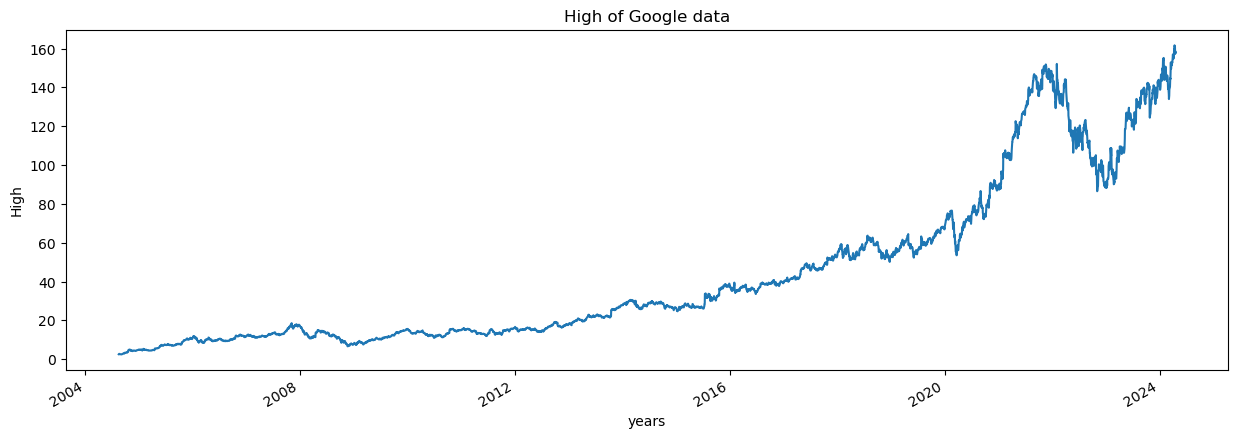

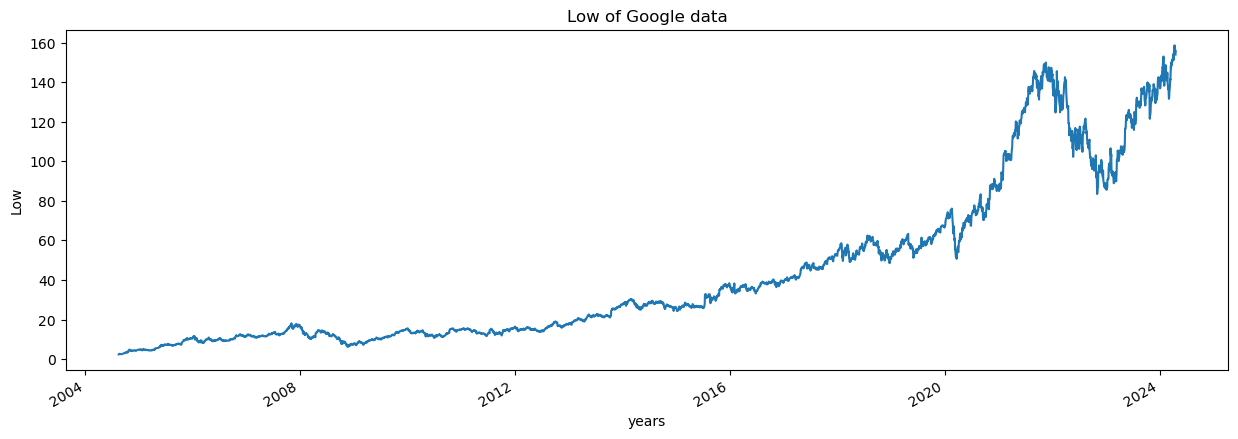

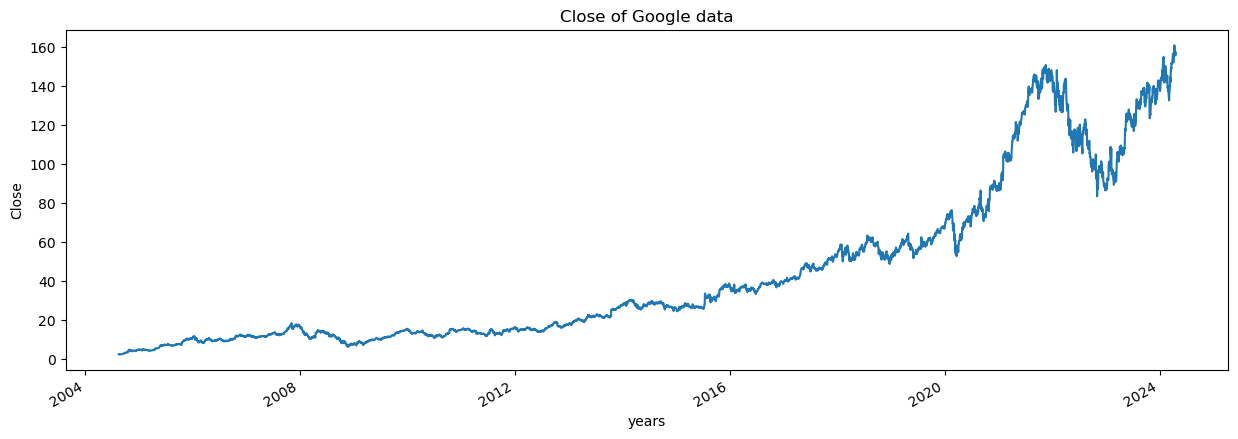

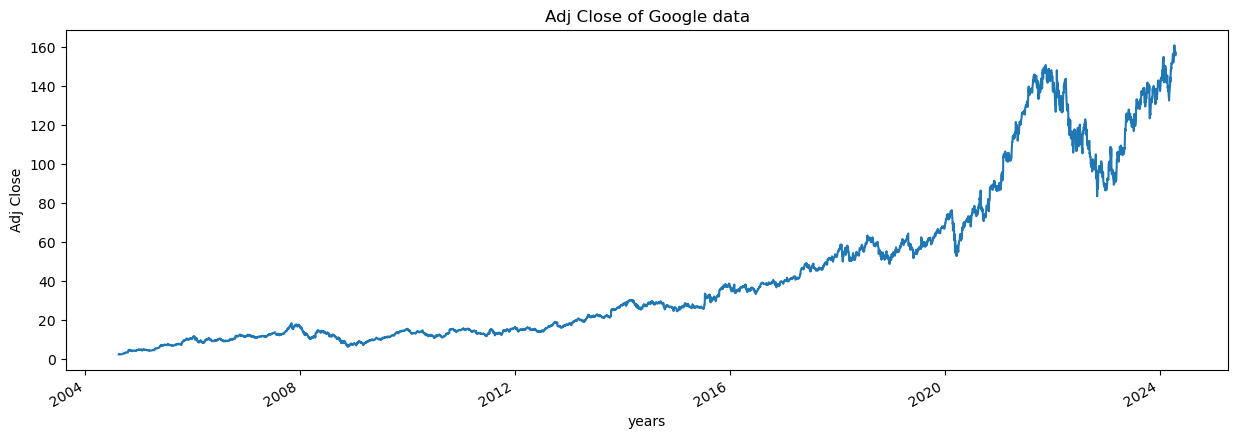

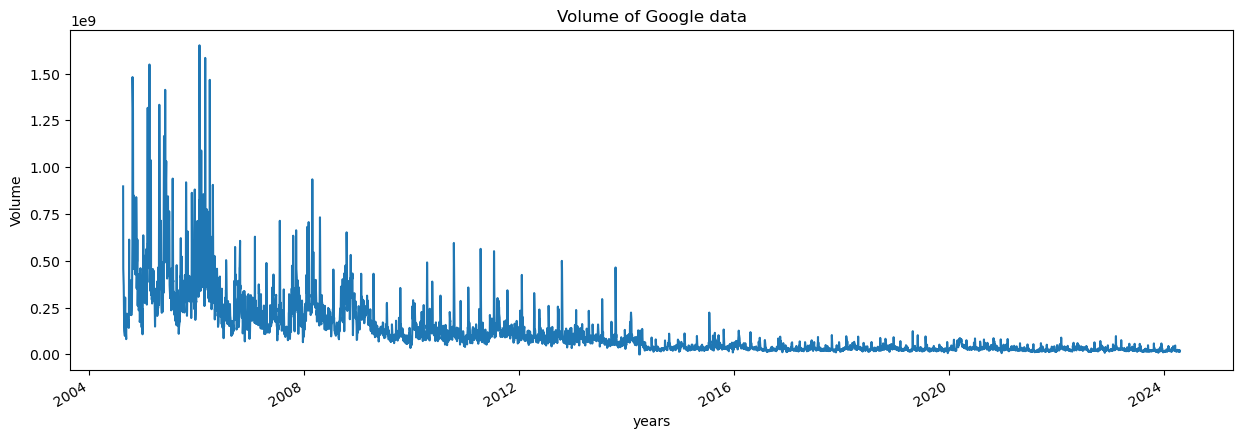

In [14]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [15]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [16]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [17]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [18]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [19]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 76


In [20]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [21]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.034039
Name: MA_for_250_days, dtype: float64

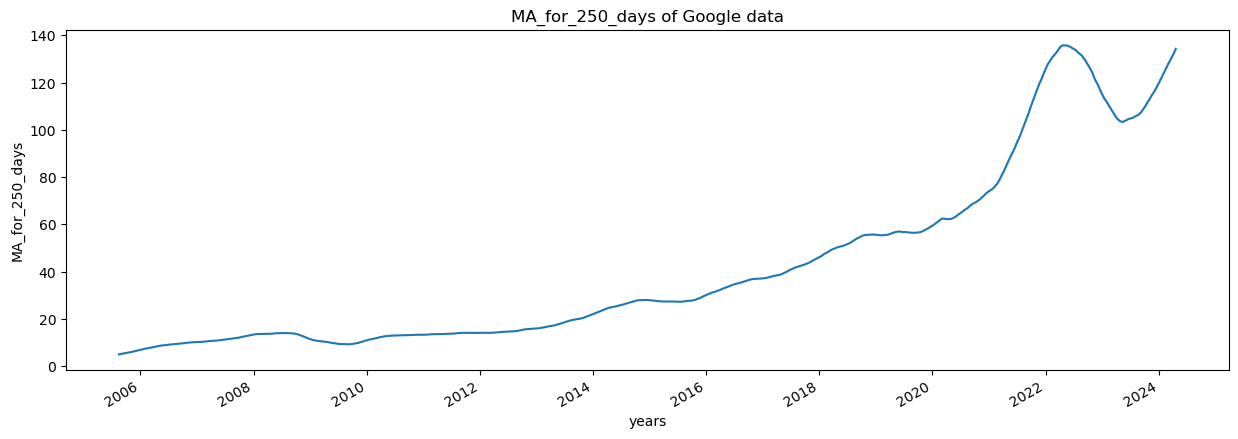

In [22]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

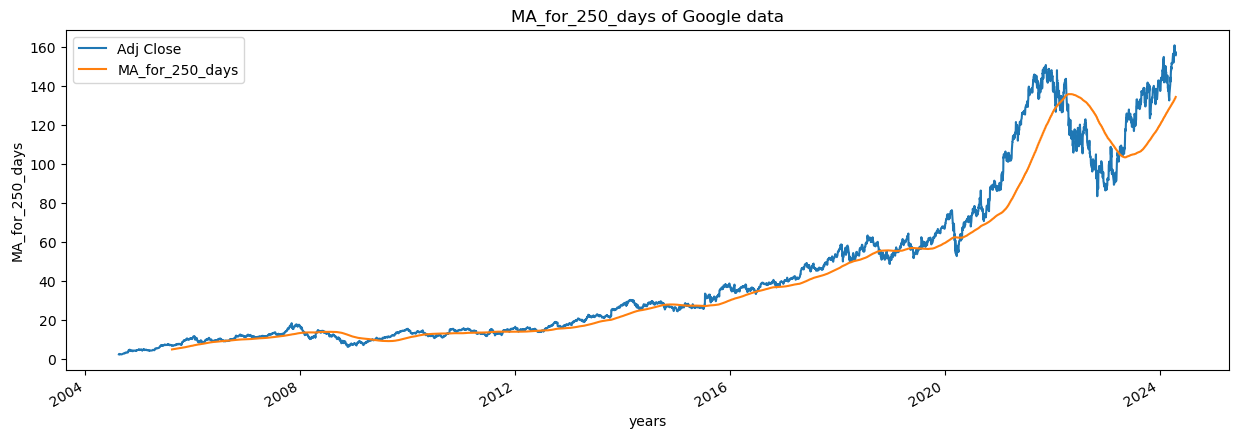

In [23]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

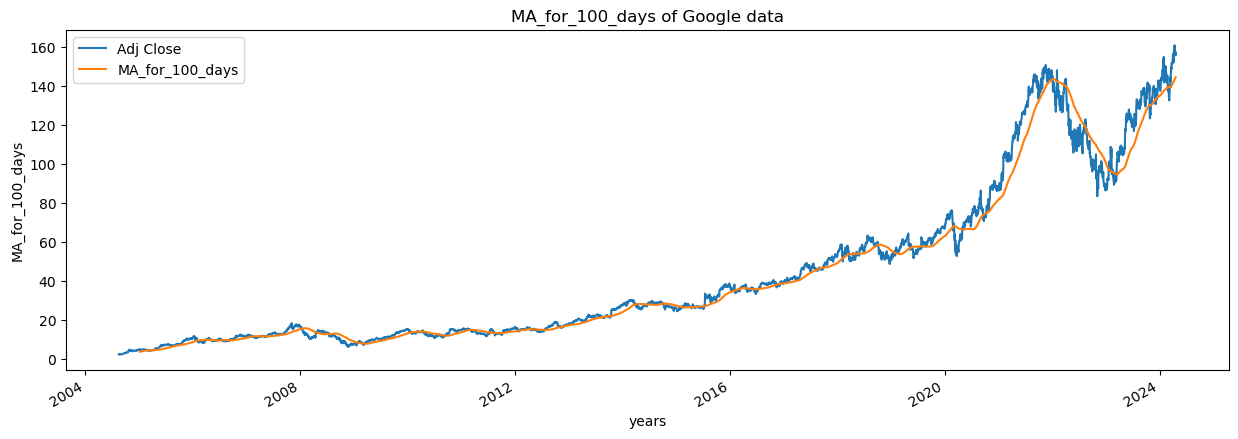

In [24]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

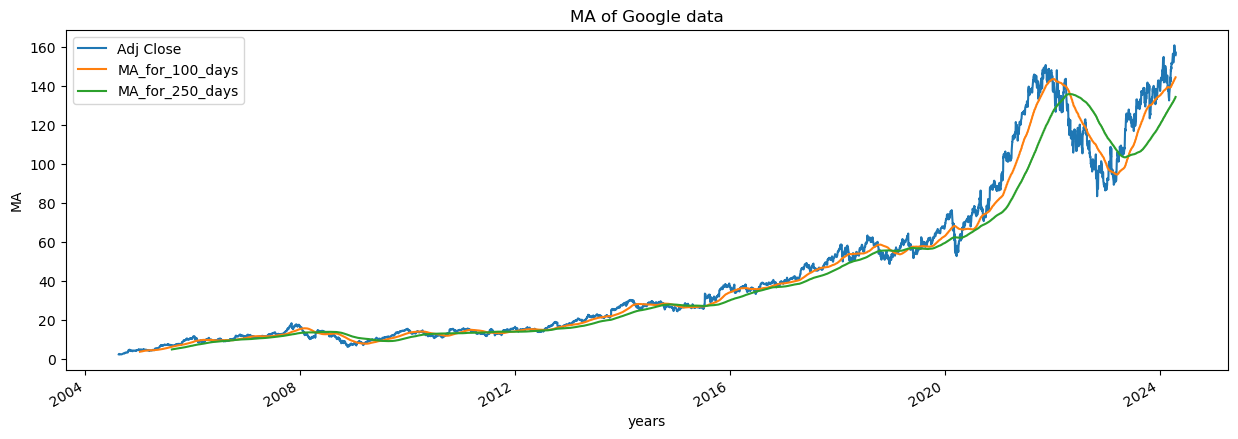

In [25]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [26]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-08-19,2.499133,NaN
2004-08-20,2.697639,0.079430
2004-08-23,2.724787,0.010064
2004-08-24,2.611960,-0.041408
2004-08-25,2.640104,0.010775


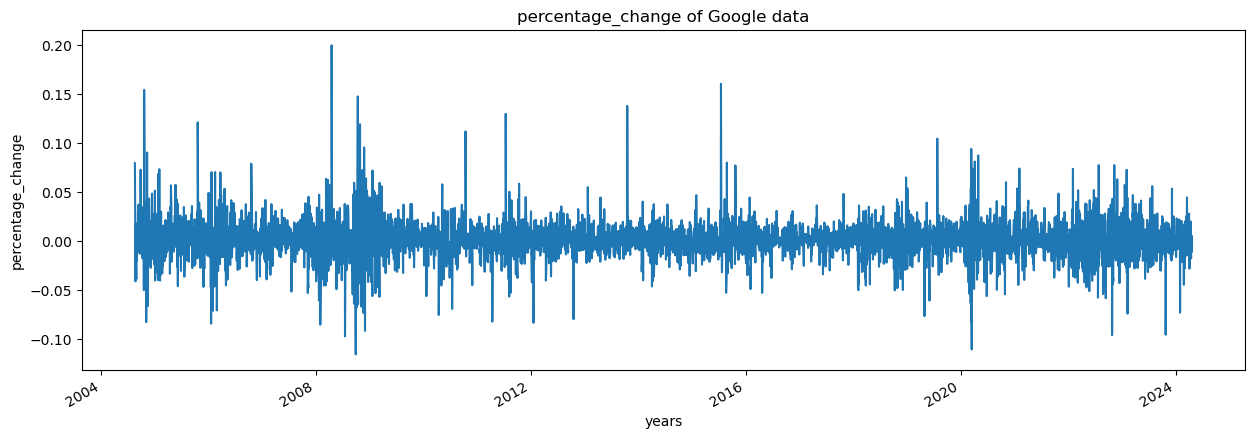

In [27]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [28]:
Adj_close_price = google_data[['Adj Close']]

In [29]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([160.78999329]), array([2.49091291]))

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[5.19282598e-05],
       [1.30592088e-03],
       [1.47741909e-03],
       ...,
       [9.75299993e-01],
       [9.78963955e-01],
       [9.67972069e-01]])

In [31]:
len(scaled_data)

4951

In [32]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [33]:
x_data[0],y_data[0]

(array([[5.19282598e-05],
        [1.30592088e-03],
        [1.47741909e-03],
        [7.64672920e-04],
        [9.42463726e-04],
        [1.24298283e-03],
        [9.66064742e-04],
        [3.14682724e-04],
        [3.71323656e-04],
        [3.77646379e-05],
        [2.36010160e-04],
        [0.00000000e+00],
        [2.47025976e-04],
        [3.60312359e-04],
        [3.61884756e-04],
        [8.37048365e-04],
        [1.17847238e-03],
        [1.80625941e-03],
        [1.88649985e-03],
        [2.19645635e-03],
        [2.75029402e-03],
        [3.04451601e-03],
        [2.80536105e-03],
        [2.89032019e-03],
        [3.27423357e-03],
        [3.11846536e-03],
        [2.87144540e-03],
        [4.22456078e-03],
        [4.88853252e-03],
        [4.65566866e-03],
        [5.12454118e-03],
        [5.51473811e-03],
        [6.03553136e-03],
        [5.83256714e-03],
        [6.11105310e-03],
        [5.93483620e-03],
        [5.54621015e-03],
        [5.88291547e-03],
        [6.4

In [34]:

int(len(x_data)*0.7)

3395

In [35]:
4908-100-int(len(x_data)*0.7)

1413

In [36]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3395, 100, 1)
(3395, 1)
(1456, 100, 1)
(1456, 1)


In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [39]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

2024-04-20 08:03:13.263242: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-04-20 08:03:13.263265: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-04-20 08:03:13.263273: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-04-20 08:03:13.263702: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-20 08:03:13.263719: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequent

In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2


2024-04-20 08:03:15.801416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


3395/3395 ━━━━━━━━━━━━━━━━━━━━ 89s 23ms/step - loss: 2.1841e-04
Epoch 2/2
3395/3395 ━━━━━━━━━━━━━━━━━━━━ 79s 23ms/step - loss: 6.3379e-05


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [43]:
predictions = model.predict(x_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


In [44]:
predictions

array([[0.3424327 ],
       [0.3466687 ],
       [0.34835497],
       ...,
       [0.916963  ],
       [0.91730475],
       [0.9221314 ]], dtype=float32)

In [45]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 56.697693],
       [ 57.368248],
       [ 57.63518 ],
       ...,
       [147.64531 ],
       [147.69942 ],
       [148.46347 ]], dtype=float32)

In [46]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 57.70249939],
       [ 57.64199829],
       [ 57.69499969],
       ...,
       [156.88000488],
       [157.46000671],
       [155.72000122]])

In [47]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [48]:
rmse

3.964927122969758

In [49]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-07-09,57.702499,56.697693
2018-07-10,57.641998,57.368248
2018-07-11,57.695000,57.635181
2018-07-12,59.174000,57.643364
2018-07-13,59.441002,58.295357


<Figure size 640x480 with 0 Axes>

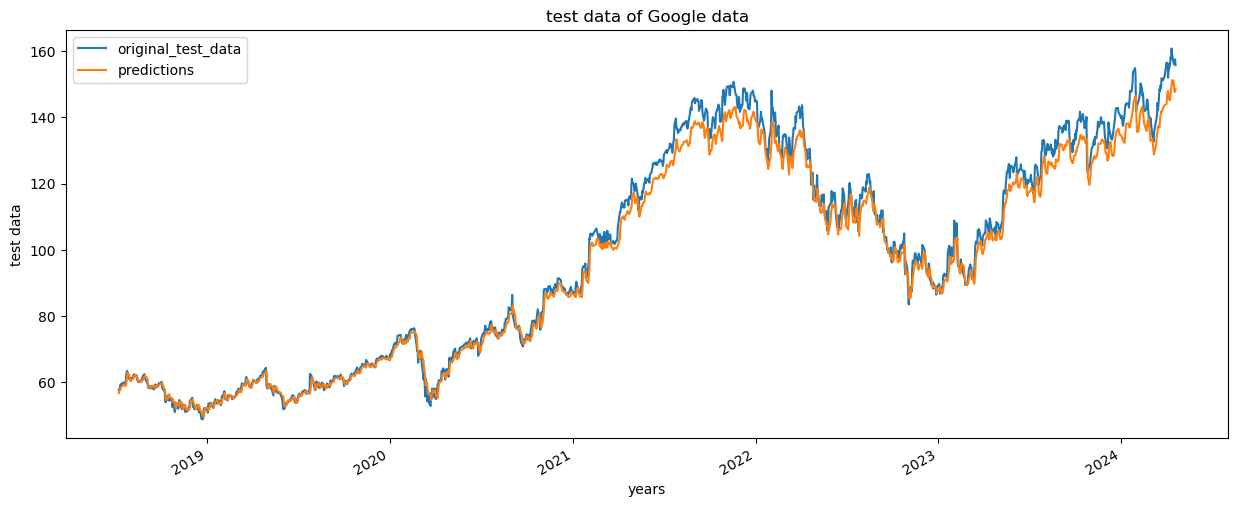

In [50]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

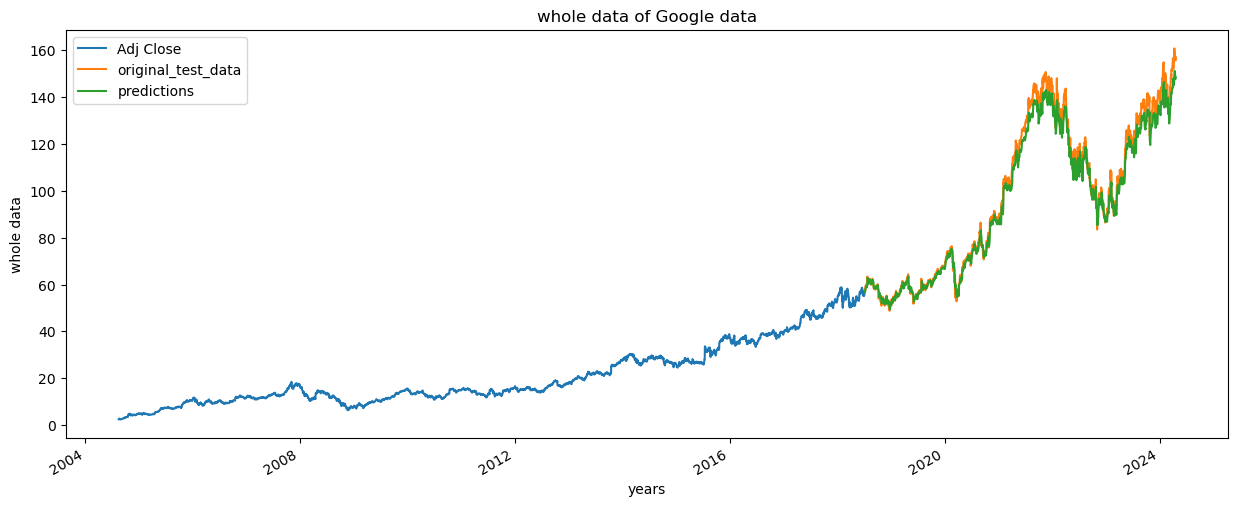

In [51]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [52]:
model.save("Latest_stock_price_model.keras")